# 0.0. IMPORTS

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as st

from IPython.core.display import HTML

## 0.1. Helper Functions

In [22]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container { width:95% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows=50
    pd.set_option('display.expand_frame_repr', False)
    pd.options.display.float_format = '{:.4f}'.format
       
    sns.set()
    
jupyter_settings()

## 0.2. Loading Data

In [7]:
data_raw = pd.read_csv('../datasets/ab_testing.csv')

# 1.0. PASSO 01 - DATA DESCRIPTION

In [11]:
df1 = data_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Dimensions

In [15]:
print(f'N rows: {df1.shape[0]}')
print(f'N columns: {df1.shape[1]}')

N rows: 45883
N columns: 8


## 1.3. Data Types

In [16]:
df1.dtypes

uid           int64
country      object
gender       object
spent         int64
purchases     int64
date         object
group        object
device       object
dtype: object

In [31]:
df1['date']

0       2016-03-08
1       2017-07-14
2       2017-09-17
3       2017-11-30
4       2018-01-10
           ...    
45878   2017-02-05
45879   2017-08-18
45880   2014-12-06
45881   2017-04-05
45882   2017-09-04
Name: date, Length: 45883, dtype: datetime64[ns]

In [32]:
df1.dtypes

uid                   int64
country              object
gender               object
spent                 int64
purchases             int64
date         datetime64[ns]
group                object
device               object
dtype: object

In [29]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4. Check NA

In [18]:
df1.isna().sum()

uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64

## 1.5. Fillout NA's

## 1.6. Verifying Types

## 1.7. Descriptive Statistics

In [33]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])#.drop(columns=['id'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [56]:
descriptive_num = num_attributes.describe().transpose()
descriptive_num['range'] = descriptive_num['max'] - descriptive_num['min']
descriptive_num['skew'] = num_attributes.skew()
descriptive_num['kurtosis'] = num_attributes.kurtosis()

descriptive_num = descriptive_num.rename(columns = {'50%':'median'})

descriptive_num = descriptive_num[['min', 'max','range','mean','median','std', 'skew', 'kurtosis']]
descriptive_num.round(1)

,min,max,range,mean,median,std,skew,kurtosis
uid,11115722.0000,99999383.0000,88883661.0000,55442322.5000,55312026.0000,25586786.8000,0.0000,-1.2000
spent,99.0000,12170.0000,12071.0000,1883.5000,1596.0000,1363.9000,1.4000,2.6000
purchases,1.0000,30.0000,29.0000,4.5000,4.0000,3.1000,1.3000,2.6000


### 1.7.1. Categorical Attributes

In [35]:
cat_attributes.columns

Index(['country', 'gender', 'group', 'device'], dtype='object')

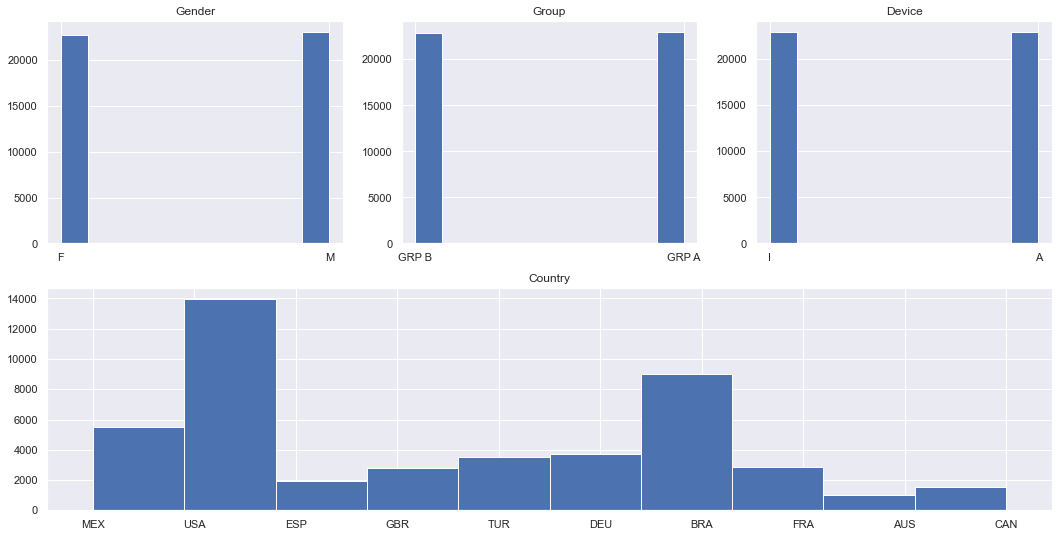

In [69]:
plt.figure(figsize=(18,9))

plt.subplot(2,3,1)
cat_attributes['gender'].hist().set_title('Gender')
plt.subplot(2,3,2)
cat_attributes['group'].hist().set_title('Group')
plt.subplot(2,3,3)
cat_attributes['device'].hist().set_title('Device')

plt.subplot(2,3,(4,6))
cat_attributes['country'].hist().set_title('Country')

plt.show()

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [48]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

## 2.2. Criacao das Hipoteses

### 2.1.1. Hipoteses Loja

### 2.1.2. Hipoteses Produto

### 2.1.3. Hipoteses Tempo

## 2.3. Lista final de hipoteses
--> Selecionando as hipoteses que posso validar com os dados nesse momento

## 2.4. Feature Engineering

# 3.0. PASSO 03 - FILTRAGEM DE VARIAVEIS

In [49]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

## 3.2. Filtragem das Colunas

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [50]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

### 4.1.2. Numerical Variable

### 4.1.3. Categorical Variable

## 4.2. Analise Bivariada

In [54]:
np.cbrt(125)

5.0

In [52]:
!pip show pandas

Name: pandas
Version: 1.4.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\miguel\anaconda3\lib\site-packages
Requires: pytz, numpy, python-dateutil
Required-by: tabula-py, streamlit, statsmodels, seaborn, pandas-datareader, altair


### 4.2.1. Resumo das Hipoteses

## 4.3. Analise Multivariada

### 4.3.1. Numerical Attributes

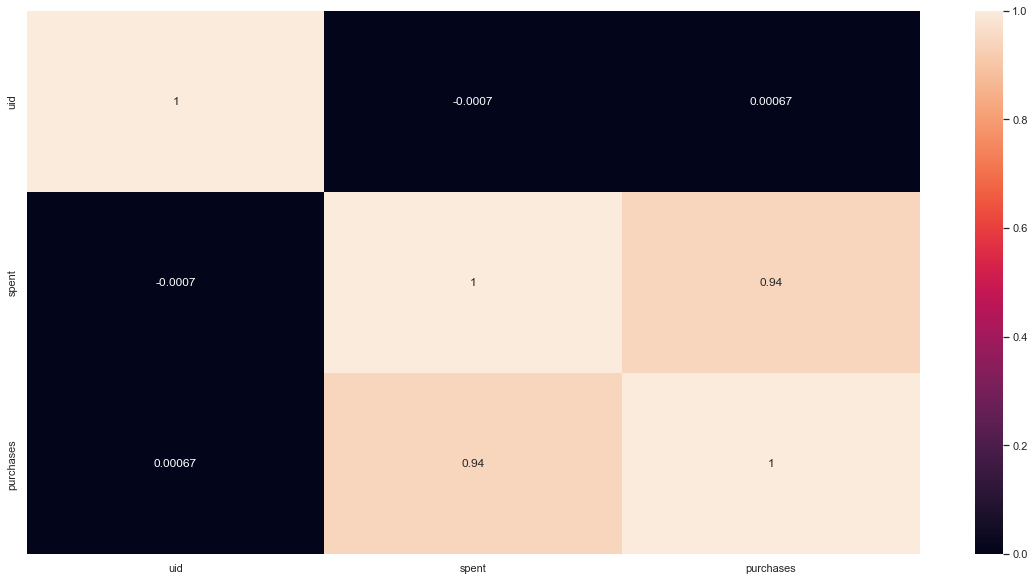

In [51]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### 4.3.2. Categorical Attributes

# 5.0. PASSO 05 - PREPARAÇAO DOS DADOS

## 5.1. Normalizacao

## 5.2. Scaling

## 5.3. Transformacao

### 5.3.1. Encoding

### 5.3.2. Response Variable Transformation

### 5.3.3. Nature Transformation

# 6.0. PASSO 06 - FEATURE SELECTION

## 6.1. Split dataframe into training and test

## 6.2. Feature Selection

# 7.0. PASSO 07 - MACHINE LEARNING MODELLING

## 7.6. Compare Model's Performance

### 7.6.1. Single Performance

### 7.6.1. Real Performance - Cross Validation

# 8.0. PASSO 08 - HYPERPARAMETER FINE TUNING

# 9.0. PASSO 09 - TRADUCAO E INTERPRETACAO DO ERRO

## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning Performance

# 10.0. PASSO 10 - DEPLOY MODEL